# Analyse et Visualisation de ventes de jeux vidéo

### Hey! Salut à toi qui regarde mon projet, dans ce projet je vais réaliser les étapes à suivre pour avoir des données propres, des graphiques lisibles et compréhensible pour un non initié.

In [1]:
# j'importe toutes les bibliothèques / librairies que j'aurais besoin pour le projet 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as sst

In [2]:
vgsales = pd.read_csv("D:/DossierHTML_CSS/Python/streamlit/video_games_visualization/vgsales.csv")

### 1. Regarder les valeurs NULL

Je vais utiliser la méthode "info()" afin d'avoir des informations principales sur la colonne "Non-Null" pour savoir si il y a des valeurs NuLL ou NaN pour soit supprimer ou formater pour éviter des graphiques incompréhensibles ou illisibles.

In [3]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Donc on peut voir que les lignes "Year" et "Publisher" on des valeurs Null le nombre de valeur etant 16598.

### 2. Dans quelles colonnes se trouvent les valeurs Null.

Maintenant on va voir combien de valeur Null ou NaN(Not a Number) sont présente dans le dataset même si on pourrait faire un calcul pour trouver mais bon c'est plus sûr. La méthode "isna()" pour afficher toutes les colonnes avec des valeurs Null et avec "sum()" on va juste afficher le nombre de valeur Null, ou sinon le relou nous affiche un tableau avec des valeurs Null sous la forme false et true.

In [4]:
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Donc voilà rien d'étonnant par rapport à notre conclusion juste avant. RaS je répete RaS.

### 3. Supprimer les valeurs inutiles.

Je vais utiliser "dropna()" pour supprimer les lignes avec des valeurs Null pour avoir des graphiques plus logique vous allez voir. :)

In [5]:
vgsales.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


On va faire un petit calcul rapide pour vérifier si les lignes supprimées correspondent bien avec notre méthode "isna()". <br> 16598 - 16291 = 307 (résultat avec dropna())<br> 271 + 58 = 329 (résultat avec isna().sum())<br> Ne vous inquiétez pas c'est normal que la somme avec isna() est plus grande car il peut y avoir des lignes ou "Year" et "Publisher" sont Null.

Et si on regardait les valeurs uniques c'est-à-dire que l'on ignore les valeurs qui apparaissent plusieurs fois.

In [6]:
vgsales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Donc voilà si vous êtes fan des jeux vidéos 31 platform pour les consoles, 12 pour le genre c'est tout à fait logique. Peut être juste pour le nom du jeu, il a donc des jeux sorties en plusieurs fois portant le même nom ? nous allons voir ça avec les graphiques.

### 4. Quelles sont les années où il y a eu le plus de vente.

Je vais juste trier les valeurs par "Year" pour regarder le plus vieux jeu.

In [7]:
vgsales.sort_values(by="Year")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


On peut voir qu'il y a des "Publisher = Unknown", les cachotier ils ont des choses à nous cacher...

### 4.1 Ventes en nombre de jeu en quantité vendu

Je vais voir en quelle année il y a eu le plus de vente pour voir où se situe nos geeks.

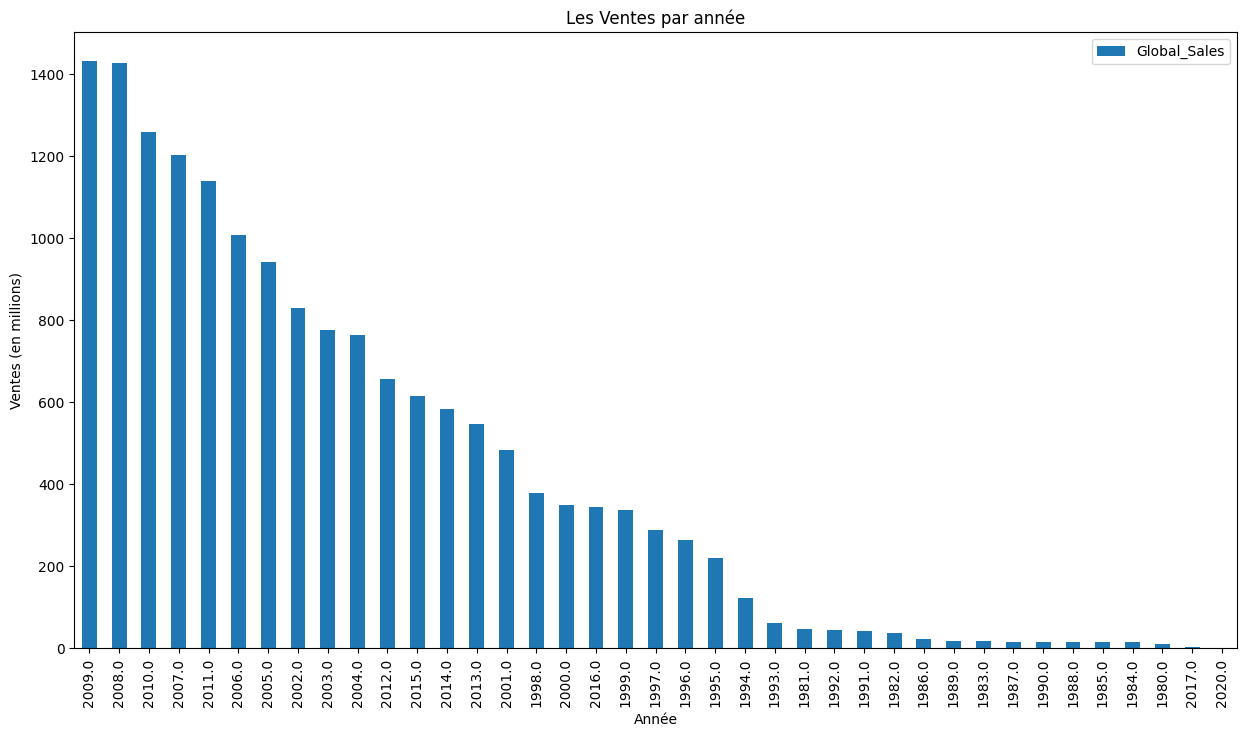

In [23]:
sales_by_year = vgsales[['Year','Global_Sales']]
df_year_sales = sales_by_year.groupby("Year").count().sort_values(by="Global_Sales", ascending=False)
df_year_sales_graph = df_year_sales.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.title("Les Ventes par année")
plt.xlabel("Année")
plt.ylabel("Ventes (en millions)")
plt.show()

### 4.2 Ventes en somme de jeu vendu par année

Et maintenant je vais regarder les vente sur les années pour voir en quelle année il y a eu le plus de vente mais normalement ça correspondra bien a notre graphique au-dessus.

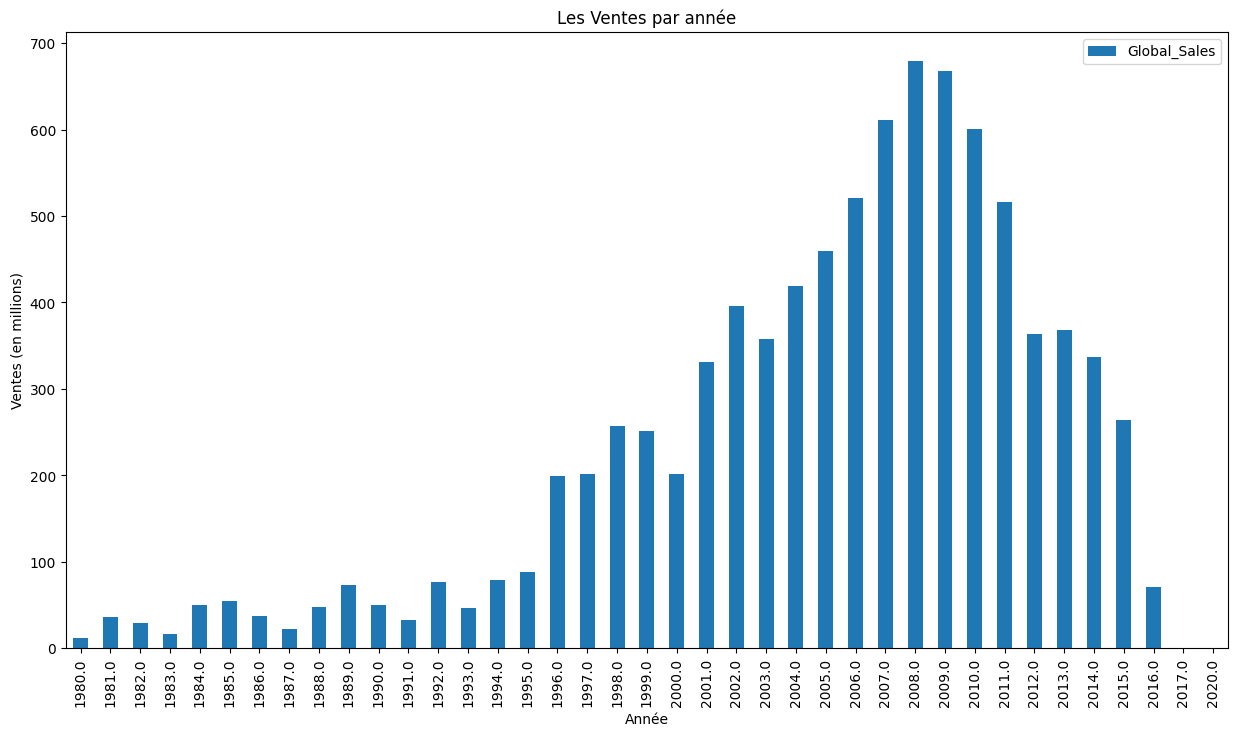

In [9]:
sales_by_year = vgsales[['Year','Global_Sales']]
df_year_sales = sales_by_year.groupby("Year").sum().sort_values(by="Year", ascending=True)
df_year_sales_graph = df_year_sales.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.title("Les Ventes par année")
plt.xlabel("Année")
plt.ylabel("Ventes (en millions)")
plt.show()

On peut observer que de 2005 à 2011 il a eu une augmentation vraiment fulgurante dans la ventes des jeux vidéos du à l'augmentation de sortie de jeu car de plus en plus de société on peut voir le jour dans le marché du jeu vidéo.

### 5. Top 10 des plus grosses ventes en Europe.

Par pure curiosité je vais également voir le top 10 des jeux les plus vendu en EU vu que je suis européen.

In [10]:
vgsales.sort_values(by="EU_Sales", ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


Comme attendu, le top 10 est composé de 9 jeux Nintendo, c'est impressionnant mais pas vraiment au vu du géant japonais qui possède les licences les plus appréciés tout ages confondus comme Mario, Zelda ou l'incontournable Pokémon. Mais étonnant du chiffres de l'amérique du nord(NA_Sales), ils connaissent le sport ?

### 6. Corrélation entre les ventes 

La méthode corrélation "corr()" nous sert à voir si les colonnes sont corrélées donc de savoir si elles sont intimement liées.

In [11]:
sales = vgsales[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
sales.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


<Axes: >

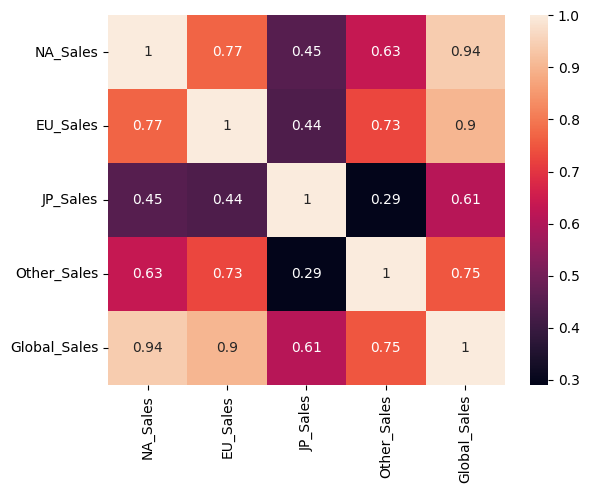

In [12]:
sb.heatmap(sales.corr(), annot=True)

J'ai utilisé seaborn pour faire une heatmap avec la corrélation et c'est plus jolie non ? bien sûr que oui.

### 7. Quelles sont les meilleurs ventes par genre.

Je vais maintenant créer une variable avec les ventes ainsi que le "Genre" du jeu vidéo réaliser un graphique où l'on va pouvoir observer les genres des jeux avec le plus de ventes.

In [13]:
# Je me fais juste une petite palette de couleur vu que les couleurs par défault son moche.
custom_colors = ['#FBF0B2', '#FFC7EA', '#D8B4F8', '#CAEDFF', '#B5F1CC','#5695DC']

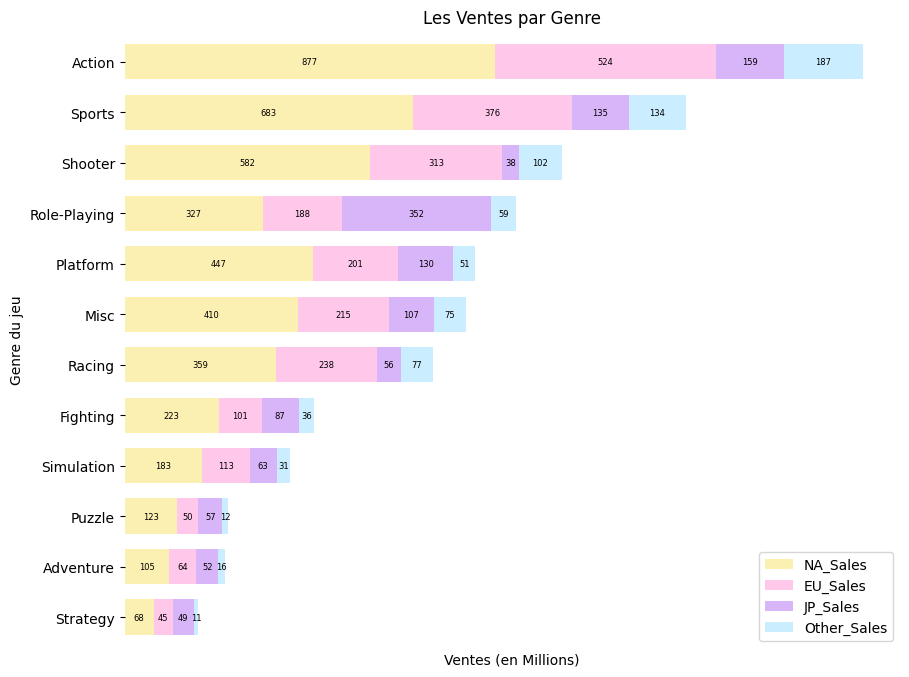

In [14]:
Sales_Genre = vgsales[["Genre","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
df_SalesGenre = Sales_Genre.groupby("Genre").sum().sort_values(by="Global_Sales", ascending=True)
Genre_graph = df_SalesGenre.drop(columns=["Global_Sales"]).plot(kind="barh", stacked=True, figsize=(10, 8), color=custom_colors, width=0.7)
for container in Genre_graph.containers:
    Genre_graph.bar_label(container, fmt='%d', label_type='center', fontsize=6, color='black')
plt.title("Les Ventes par Genre")
plt.xlabel("Ventes (en Millions)")
plt.xticks([])
plt.ylabel("Genre du jeu")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

On peut observer que les jeux d'Actions ont une vente supérieur dans les trois pays suivie par les jeux de Sports. Mais on peut par exemple voir que certains pays sont plus consommateurs d'un certain jeu par exemple le Japon est bien plus attiré par les jeux de Role play où la vente est supérieur par rapport aux autres et quasiment 50% de plus même par rapport aux plus gros consommateurs l'Amérique du Nord.

### 8. Quelles sont les meilleurs ventes par Editeur.

Je suis un peu curieux de voir pour nos éditeurs donc allons voir un peu ce qui se passe même si on a pu voir que Nintendo domine bien le marché.

In [15]:
sales_columns = vgsales[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
sales_publisher = sales_columns.groupby("Publisher").sum().sort_values(by="Global_Sales", ascending=False).head(10).iloc[::-1]
df_publisher = sales_publisher.drop(columns=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])
sales_publisher.iloc[::-1]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72
Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
THQ,208.77,94.73,5.01,32.14,340.77
Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
Sega,109.40,82.00,57.03,24.52,272.99


Sans surprise on peut voir que Nintendo domine le marché avec plusieurs millions de ventes d'avance sur Electronics Arts qui est bien supérieur aux autres.

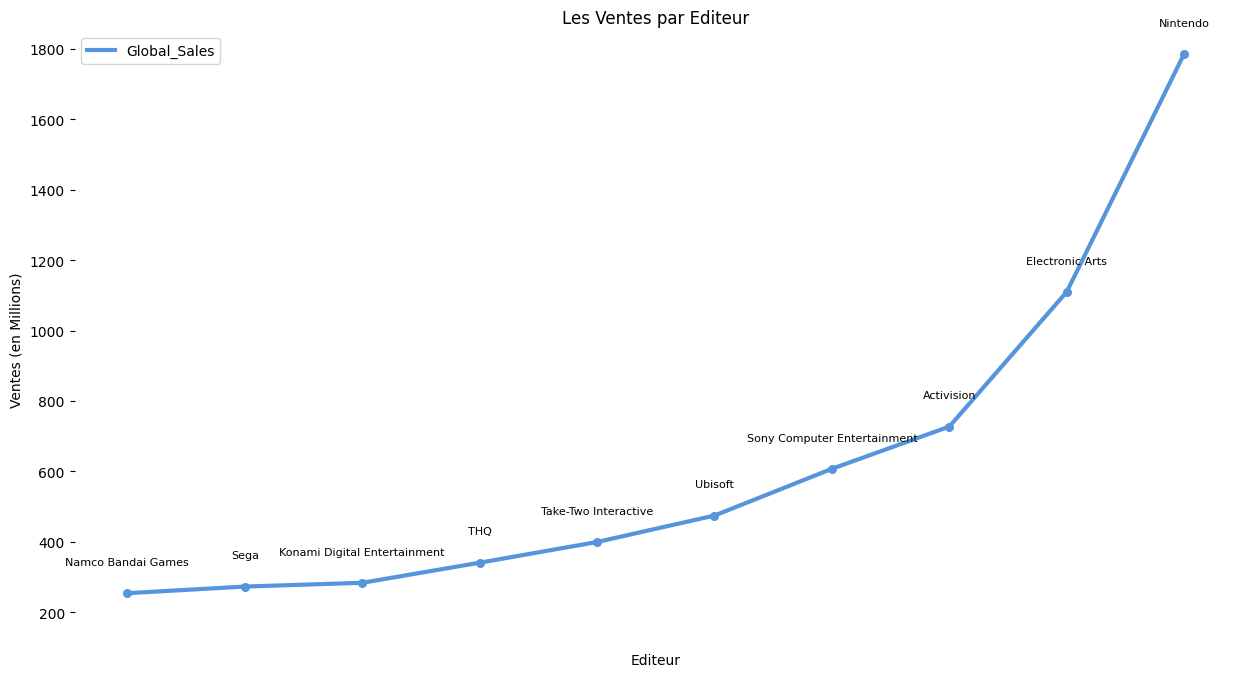

In [16]:
df_publisher.plot(figsize=(15, 8), color=custom_colors[5], linewidth=3)
plt.title("Les Ventes par Editeur")
plt.xlabel("Editeur")
plt.xticks([])
plt.ylabel("Ventes (en Millions)")
y_min = 100
y_max = 1850
plt.ylim(y_min, y_max)
for i, row in enumerate(df_publisher.index):
    plt.scatter(i, df_publisher.loc[row, 'Global_Sales'], marker='o', color=custom_colors[5], s=30)
for i, row in enumerate(df_publisher.index):
    plt.text(i, df_publisher.loc[row, 'Global_Sales']+80, row, ha='center', va='baseline', fontsize=8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

Voilà un petit visuel pour vous aidez à mieux voir la courbe ascendante.

### 9. Quelles sont les meilleurs ventes par console.

On a observer pour l'année, l'entreprise, le genre et si l'on regardait pour la console, ça vous tente ? 

In [17]:
sales_by_platform = vgsales[['Platform','Global_Sales']]
df_platform = sales_by_platform.groupby("Platform").sum().sort_values(by="Global_Sales", ascending=False)
df_platform

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


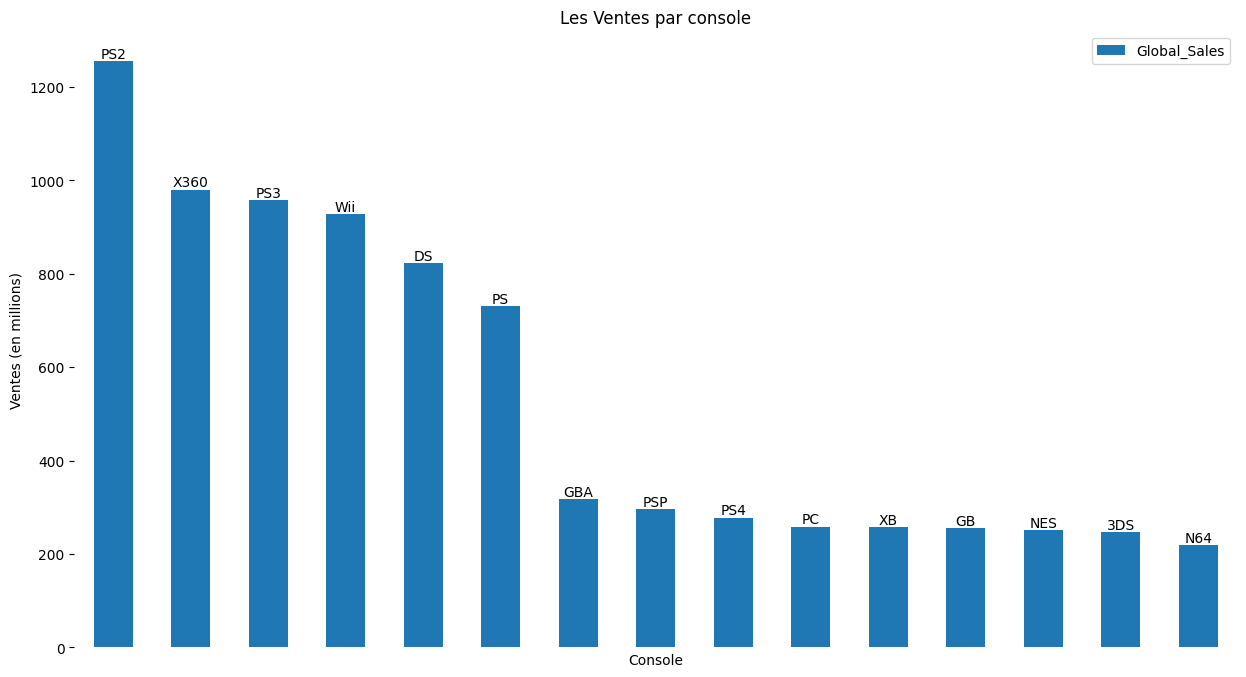

In [18]:
df_platform = sales_by_platform.groupby("Platform").sum().sort_values(by="Global_Sales", ascending=False).head(15)
df_platform_sales_graph = df_platform.plot(kind="bar", stacked=True, figsize=(15, 8))
for i, value in enumerate(df_platform["Global_Sales"]):
    plt.text(i, value, df_platform.index[i], ha='center', va='bottom', fontsize=10)
plt.title("Les Ventes par console")
plt.xlabel("Console")
plt.xticks([])
plt.ylabel("Ventes (en millions)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

Donc pour la console ayant réalisé le plus de vente de jeu est la PS2, c'est plutôt étrange car l'entreprise ayant réalisé le plus de vente est Nintendo non ? Nintendo c'est pas la Wii ou la 3DS ? Et bien oui avant les jeux Nintendo était distribuer à d'autre concepteur de console donc on avait des Mario Bros sur PS2 par exemple et donc comme la PS2 était l'un des consoles les plus appréciées il est donc logique qu'il soit premier.

### Cela conclu donc notre analyse sur ce dataset sur les ventes des jeux vidéos, il a manqué quelque donnée après 2016 donc voilà je ne pourrais pas etre plus précis vis-à-vis de notre époque actuelle 2023, si je trouve un dataset plus récent je me ferais un plaisir de refaire une analyse.

## Merci beaucoup d'avoir regardé jusqu'au bout !